### First Things First

This notebook is to demonstrate how to create an item icon for the handful of item model types in NWN.  The examples here load objects from the resource manager, but they could be loaded from files.  

Notes: 

1. A full NWN:EE install is required to run this notebook, the docker distro won't work because it strips textures.
2. At the end of all these examples the image is flipped, this is because when NWN was created all textures were pre-flipped to be in the format OpenGL expects, rather then to flip them on load as is common today. 

In [11]:
import rollnw
from PIL import Image
from IPython.display import display

rollnw.kernel.start()

# If one wanted to load all your modules and haks, one could do so here:
mod = rollnw.kernel.load_module("../tests/test_data/user/modules/DockerDemo.mod")

#### Simple Items

Simple items are just single images, color variaties are explicit.  In the below example, we'll use a small shield:

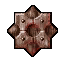

In [12]:
simple = rollnw.kernel.objects().item("x2_smchaosshield")
simple_icon = simple.get_icon_by_part()
simple_image = Image.frombytes(
    "RGBA", (simple_icon.width(), simple_icon.height()), simple_icon.data())
mirrored_image = simple_image.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
display(mirrored_image)

#### Layered Items

Layered item icons are single images in the PLT format. Examples: Helmets, Cloaks.  In this example, we'll use a cloak.  The ``Item.get_icon_by_part`` function does all the work of decoding PLT textures and coloring them into RGBA formatted images.


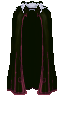

In [13]:
layered = rollnw.kernel.objects().item("x2_it_drowcl001")
layered_icon = layered.get_icon_by_part()
layered_image = Image.frombytes(
    "RGBA", (layered_icon.width(), layered_icon.height()), layered_icon.data())
mirrored_image = layered_image.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
display(mirrored_image)

#### Compound Items

Compound items combine 3 seperate images to produce the final icon.  Examples of this type are weapons and boots.  Below we'll use a Bastard Sword.

When combining the images this will draw the bottom first, then the middle, then the top onto to the final image.

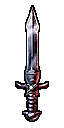

In [14]:
compound = rollnw.kernel.objects().item("nw_wswbs001")

bottom = compound.get_icon_by_part(rollnw.ItemModelParts.model1)
bottom_image = Image.frombytes(
    "RGBA", (bottom.width(), bottom.height()), bottom.data())

middle = compound.get_icon_by_part(rollnw.ItemModelParts.model2)
middle_image = Image.frombytes(
    "RGBA", (middle.width(), middle.height()), middle.data())

top = compound.get_icon_by_part(rollnw.ItemModelParts.model3)
top_image = Image.frombytes(
    "RGBA", (top.width(), top.height()), top.data())

bottom_image.paste(middle_image, (0, 0), middle_image)
bottom_image.paste(top_image, (0, 0), top_image)

mirrored_image = bottom_image.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
display(mirrored_image)

#### Armor

The last item model type is armor.  Here we combine up 5 images: chest, pelvis, belt, right and left shoulder, and a robe.
I haven't investigated the order in which these are drawn by the toolset by default, so this example will go with pelvis, belt, chest, shoulders, and then finally robe. 

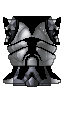

In [15]:
armor = rollnw.kernel.objects().item("x2_it_adaplate")
base_image = None

parts = [rollnw.ItemModelParts.armor_pelvis,
         rollnw.ItemModelParts.armor_belt,
         rollnw.ItemModelParts.armor_torso,
         rollnw.ItemModelParts.armor_lshoul,
         rollnw.ItemModelParts.armor_rshoul,
         rollnw.ItemModelParts.armor_robe]

for part in parts:
    texture = armor.get_icon_by_part(part)
    if texture is not None:
        image = Image.frombytes(
            "RGBA", (texture.width(), texture.height()), texture.data())
        if base_image is None:
            base_image = image
        else:
            base_image.paste(image, (0, 0), image)

if base_image is not None:
    mirrored_image = base_image.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
    display(mirrored_image)